In [4]:
#IMPORTING
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import cv2

In [5]:
# print(f"shoe_data shape: {shoe_data.shape}")

In [6]:
import os
import shutil

def move_images(source_dir, target_dir, limit=3000):
    # Check if target directory exists, if not, create it
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # Counter for the number of moved images
    moved_count = 0

    # List of files to exclude
    excluded_files = ['10.jpg', '7.jpg']

    # Walk through all directories and subdirectories
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            # Check if the file is an image and not in the excluded list
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')) and file not in excluded_files:
                # Construct full file path
                file_path = os.path.join(root, file)
                
                # Construct the path where the image will be moved
                target_path = os.path.join(target_dir, file)
                
                # Move the image
                shutil.copy(file_path, target_path)
                print(f"Moved: {file_path} -> {target_path}")
                
                # Increment the counter
                moved_count += 1
                
                # Stop after moving the first 'limit' images
                if moved_count >= limit:
                    print(f"Reached the limit of {limit} images.")
                    return

# Set the source directory and the target directory
source_directory = "/kaggle/input/large-shoe-dataset-ut-zappos50k"  # Replace with the actual path
target_directory = "/kaggle/working/allimages/shoes"  # Replace with the target folder path

# Move the first 100 images, excluding 10.jpg and 7.jpg
move_images(source_directory, target_directory, limit=2000)

Moved: /kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Sandals/Athletic/Nike/7525639.191707.jpg -> /kaggle/working/allimages/shoes/7525639.191707.jpg
Moved: /kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Sandals/Athletic/Nike/7525639.151.jpg -> /kaggle/working/allimages/shoes/7525639.151.jpg
Moved: /kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Sandals/Athletic/Teva Kids/7592562.275.jpg -> /kaggle/working/allimages/shoes/7592562.275.jpg
Moved: /kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Sandals/Athletic/Keen Kids/7501314.4535.jpg -> /kaggle/working/allimages/shoes/7501314.4535.jpg
Moved: /kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Sandals/Athletic/Keen Kids/7397030.4535.jpg -> /kaggle/working/allimages/shoes/7397030.4535.jpg
Moved: /kaggle/input/larg

In [7]:
# import os 
# import matplotlib.pyplot as plt 
# import cv2 
# import numpy as np 
# from tqdm import tqdm
# shoe_data = []
# for img in tqdm(os.listdir('../input/cryptopunks/imgs/imgs')):
#     path = '/kaggle/working/allimages/shoes/{}'.format(img)    
#     image = plt.imread(path)
#     image = image.astype('float32')
#     image = image
#     shoe_data.append(image) 
# shoe_data = np.array(shoe_data)

import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

shoe_data = []

# Directory containing images
image_dir = '/kaggle/working/allimages/shoes'

for img in tqdm(os.listdir(image_dir)):
    path = os.path.join(image_dir, img)
    try:
        image = plt.imread(path)
        image = cv2.resize(image, (24, 24))  # Resize to 24x24
        
        # Check if the image is grayscale (2D), then add the channel dimension
        if image.ndim == 2:  # Grayscale image
            image = np.stack([image] * 4, axis=-1)  # Duplicate grayscale to 4 channels
        elif image.shape[-1] == 3:  # RGB image, add an alpha channel to make it 4 channels
            alpha_channel = np.ones((24, 24, 1))  # Create an alpha channel (fully opaque)
            image = np.concatenate([image, alpha_channel], axis=-1)  # Add alpha channel
        
        # Normalize to [0, 1]
        image = image.astype('float32') / 255.0

        # Append to the list
        shoe_data.append(image)
    except (FileNotFoundError, OSError, ValueError) as e:
        print(f"Error reading file {path}: {e}")
        continue

# Convert list to a numpy array
shoe_data = np.array(shoe_data)

# Print shape of shoe_data
print(f"shoe_data shape: {shoe_data.shape}")

100%|██████████| 2000/2000 [00:01<00:00, 1814.45it/s]


shoe_data shape: (2000, 24, 24, 4)


In [8]:
import keras

from keras.models import Sequential, Model, Input
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import UpSampling2D
from keras.layers import Lambda
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import Add, Multiply
from keras.losses import mse, binary_crossentropy
import keras.backend as K

Using TensorFlow backend.


In [9]:
np.random.seed(20)

#NUMBER OF DIMENSIONS IN THE LATENT SPACE
latent_dims = 576

In [10]:
encoder_in = Input(shape=(24,24,4))  

encoder_l1 = Conv2D(filters=32, kernel_size=5, strides=1, padding='same',name = 'c11', input_shape=(24,24,4))(encoder_in)
encoder_l1 = BatchNormalization(name = '1b1')(encoder_l1)
encoder_l1 = LeakyReLU(0.2,name = '1r1')(encoder_l1)

encoder_l1 = Conv2D(filters=64, kernel_size=5, strides=2, padding='same',name = 'c12')(encoder_l1)
encoder_l1 = BatchNormalization(name = 'b12')(encoder_l1)
encoder_l1 = LeakyReLU(0.2,name = 'r12')(encoder_l1)


encoder_l2 = Conv2D(filters=128, kernel_size=5, strides=2, padding='same',name = 'c13')(encoder_l1)
encoder_l2 = BatchNormalization(name = 'b13')(encoder_l2)
encoder_l2 = LeakyReLU(0.2,name = 'r13')(encoder_l2)

encoder_l3 = Conv2D(filters=256, kernel_size=5, strides=2, padding='same',name = 'c14')(encoder_l2)
encoder_l3 = BatchNormalization(name = 'b14')(encoder_l3)
encoder_l3 = LeakyReLU(0.2,name = 'r14')(encoder_l3)


encoder_l4 = Conv2D(filters=512, kernel_size=5, strides=2, padding='same',name = 'c15')(encoder_l3)
encoder_l4 = BatchNormalization(name = 'b15')(encoder_l4)
encoder_l4 = LeakyReLU(0.2,name = 'r15')(encoder_l4)

flatten = Flatten(name = 'r125')(encoder_l4)

encoder_dense = Dense(1024)(flatten)
encoder_dense = BatchNormalization(name = 'br15')(encoder_dense)
encoder_out = LeakyReLU(0.2,name = 'r1115')(encoder_dense)


mu = Dense(latent_dims)(encoder_out)
log_var = Dense(latent_dims)(encoder_out)


epsilon = Input(tensor=K.random_normal(shape=(K.shape(mu)[0], latent_dims)))  ##INPUT EPSILON FOR RANDOM SAMPLING

sigma = Lambda(lambda x: K.exp(0.5 * x))(log_var) # CHANGE log_var INTO STANDARD DEVIATION(sigma)
z_eps = Multiply()([sigma, epsilon])

z = Add()([mu, z_eps])

encoder=Model([encoder_in,epsilon], z)
encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 24, 24, 4)    0                                            
__________________________________________________________________________________________________
c11 (Conv2D)                    (None, 24, 24, 32)   3232        input_1[0][0]                    
__________________________________________________________________________________________________
1b1 (BatchNormalization)        (None, 24, 24, 32)   128         c11[0][0]                        
__________________________________________________________________________________________________
1r1 (LeakyReLU)                 (None, 24, 24, 32)   0           1b1[0][0]                        
__________________________________________________________________________________________________
c12 (Conv2

In [11]:
decoder = Sequential()
decoder.add(Dense(1024, input_shape=(latent_dims,)))
decoder.add(BatchNormalization(name = 'b1'))
decoder.add(LeakyReLU(0.2,name = 'r1'))

decoder.add(Dense(2048))
decoder.add(BatchNormalization(name = 'b2'))
decoder.add(LeakyReLU(0.2,name = 'r2'))

decoder.add(Reshape(target_shape=(2,2,512)))

decoder.add(Conv2DTranspose(filters=256, kernel_size=5, strides=2, padding='same',name = 'c1'))
decoder.add(BatchNormalization(name = 'b3'))
decoder.add(LeakyReLU(0.2,name = 'r3'))

decoder.add(Conv2DTranspose(filters=128, kernel_size=5, strides=3, padding='same',name = 'c2'))
decoder.add(BatchNormalization(name = 'b4'))
decoder.add(LeakyReLU(0.2,name = 'r4'))

decoder.add(Conv2DTranspose(filters=64, kernel_size=5, strides=2, padding='same',name = 'c3'))
decoder.add(BatchNormalization(name = 'b5'))
decoder.add(LeakyReLU(0.2,name = 'r5'))

decoder.add(Conv2DTranspose(filters=32, kernel_size=5, strides=1, padding='same',name = 'c33'))
decoder.add(BatchNormalization(name = 'b35'))
decoder.add(LeakyReLU(0.2,name = 'r35'))

decoder.add(Conv2DTranspose(filters=4, kernel_size=5,activation = 'sigmoid',strides=1, padding='same',name = 'c5'))
decoder.add(BatchNormalization(name = 'b7'))
decoder.add(Activation('sigmoid'))

decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              590848    
_________________________________________________________________
b1 (BatchNormalization)      (None, 1024)              4096      
_________________________________________________________________
r1 (LeakyReLU)               (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
b2 (BatchNormalization)      (None, 2048)              8192      
_________________________________________________________________
r2 (LeakyReLU)               (None, 2048)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 2, 2, 512)         0         
__________

In [12]:
# COMBINING ENCODER AND DECODER TO COMPLETE THE VARIATIONAL AUTO ENCODER

vae_preds = decoder(z)
vae = Model([encoder_in, epsilon], vae_preds)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 24, 24, 4)    0                                            
__________________________________________________________________________________________________
c11 (Conv2D)                    (None, 24, 24, 32)   3232        input_1[0][0]                    
__________________________________________________________________________________________________
1b1 (BatchNormalization)        (None, 24, 24, 32)   128         c11[0][0]                        
__________________________________________________________________________________________________
1r1 (LeakyReLU)                 (None, 24, 24, 32)   0           1b1[0][0]                        
__________________________________________________________________________________________________
c12 (Conv2

In [13]:
def reconstruction_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred))

def kl_loss(y_true, y_pred):
    kl_loss = - 0.5 * K.mean(1 + log_var - K.square(mu) - K.exp(log_var), axis=-1)
    return kl_loss

def vae_loss(y_true, y_pred):
    return reconstruction_loss(y_true, y_pred) + 0.03 * kl_loss(y_true, y_pred)   #scaling kl_loss by 0.03 seem to help

In [14]:
c = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
vae.compile(optimizer='adam', loss=vae_loss , metrics=[reconstruction_loss, kl_loss])

In [21]:
history = vae.fit(shoe_data, shoe_data, epochs=100, batch_size=64, validation_data=(shoe_data, shoe_data))

Train on 2000 samples, validate on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 1s 749us/step - loss: 0.0536 - reconstruction_loss: 0.0517 - kl_loss: 0.0625 - val_loss: 0.0584 - val_reconstruction_loss: 0.0555 - val_kl_loss: 0.0982
Epoch 2/100
2000/2000 [==============================] - 1s 740us/step - loss: 0.0520 - reconstruction_loss: 0.0501 - kl_loss: 0.0609 - val_loss: 0.0571 - val_reconstruction_loss: 0.0537 - val_kl_loss: 0.1137
Epoch 3/100
2000/2000 [==============================] - 1s 744us/step - loss: 0.0502 - reconstruction_loss: 0.0484 - kl_loss: 0.0595 - val_loss: 0.0517 - val_reconstruction_loss: 0.0488 - val_kl_loss: 0.0962
Epoch 4/100
2000/2000 [==============================] - 1s 746us/step - loss: 0.0490 - reconstruction_loss: 0.0472 - kl_loss: 0.0591 - val_loss: 0.0555 - val_reconstruction_loss: 0.0529 - val_kl_loss: 0.0878
Epoch 5/100
2000/2000 [==============================] - 1s 740us/step - loss: 0.0478 - reconstruction_loss: 0.0461 

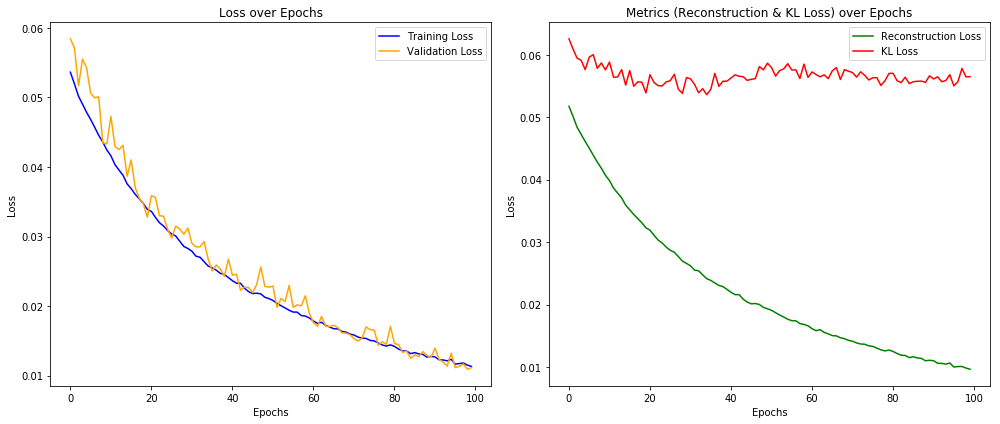

In [22]:
def plot_loss_and_metrics(history):
    # Get the training and validation loss from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Get the metrics (reconstruction loss and KL loss)
    reconstruction_loss = history.history['reconstruction_loss']
    kl_loss = history.history['kl_loss']
    
    # Create subplots for loss and metrics
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot Loss
    axes[0].plot(loss, label='Training Loss', color='blue')
    axes[0].plot(val_loss, label='Validation Loss', color='orange')
    axes[0].set_title('Loss over Epochs')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    
    # Plot Metrics (Reconstruction and KL loss)
    axes[1].plot(reconstruction_loss, label='Reconstruction Loss', color='green')
    axes[1].plot(kl_loss, label='KL Loss', color='red')
    axes[1].set_title('Metrics (Reconstruction & KL Loss) over Epochs')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the loss and metrics
plot_loss_and_metrics(history)

In [23]:
def plot_images(rows, cols, images, title):
    grid = np.zeros(shape=(rows*24, cols*24,4))
    for row in range(rows):
        for col in range(cols):
            grid[row*24:(row+1)*24, col*24:(col+1)*24, :] = images[row*cols + col]

    plt.figure(figsize=(40,40))       
    plt.imshow(grid)
    plt.title(title)
    plt.show()

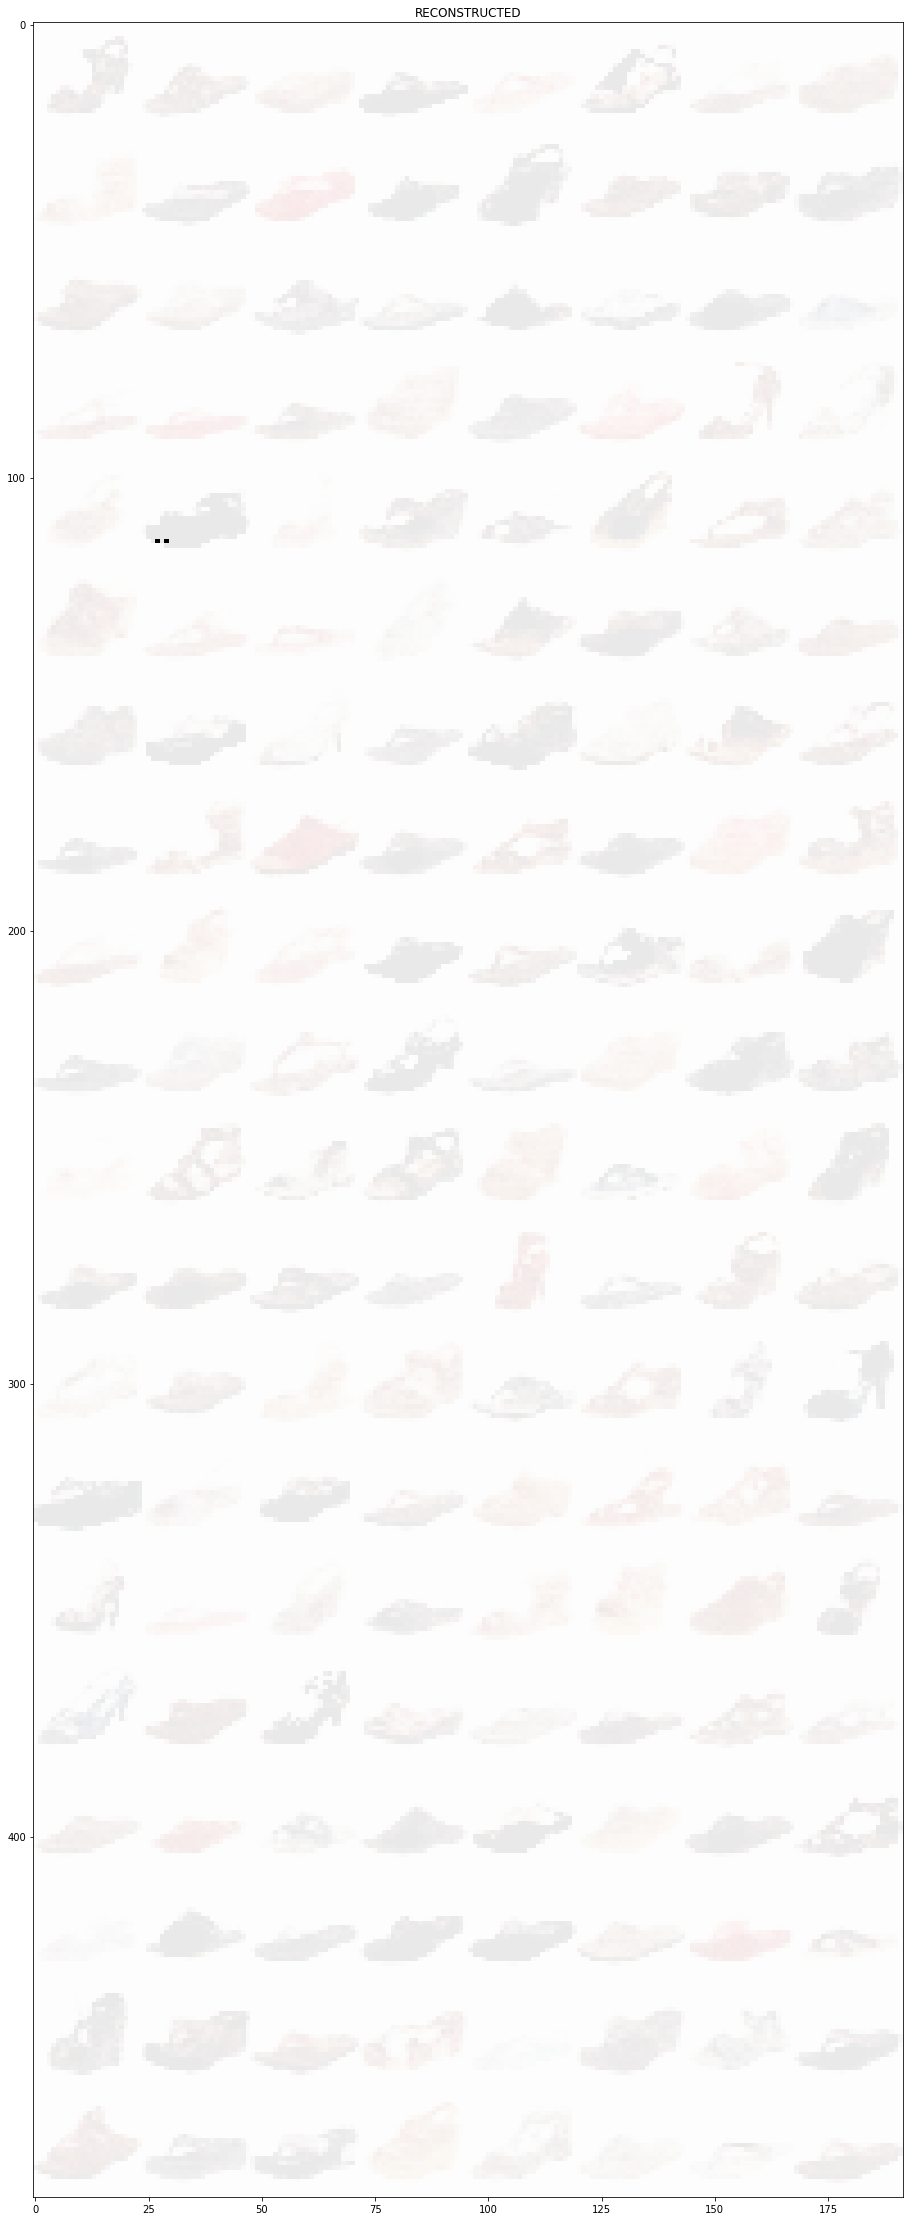

In [31]:
predictions  = vae.predict(shoe_data[:200])
plot_images(20,8,predictions, "RECONSTRUCTED")

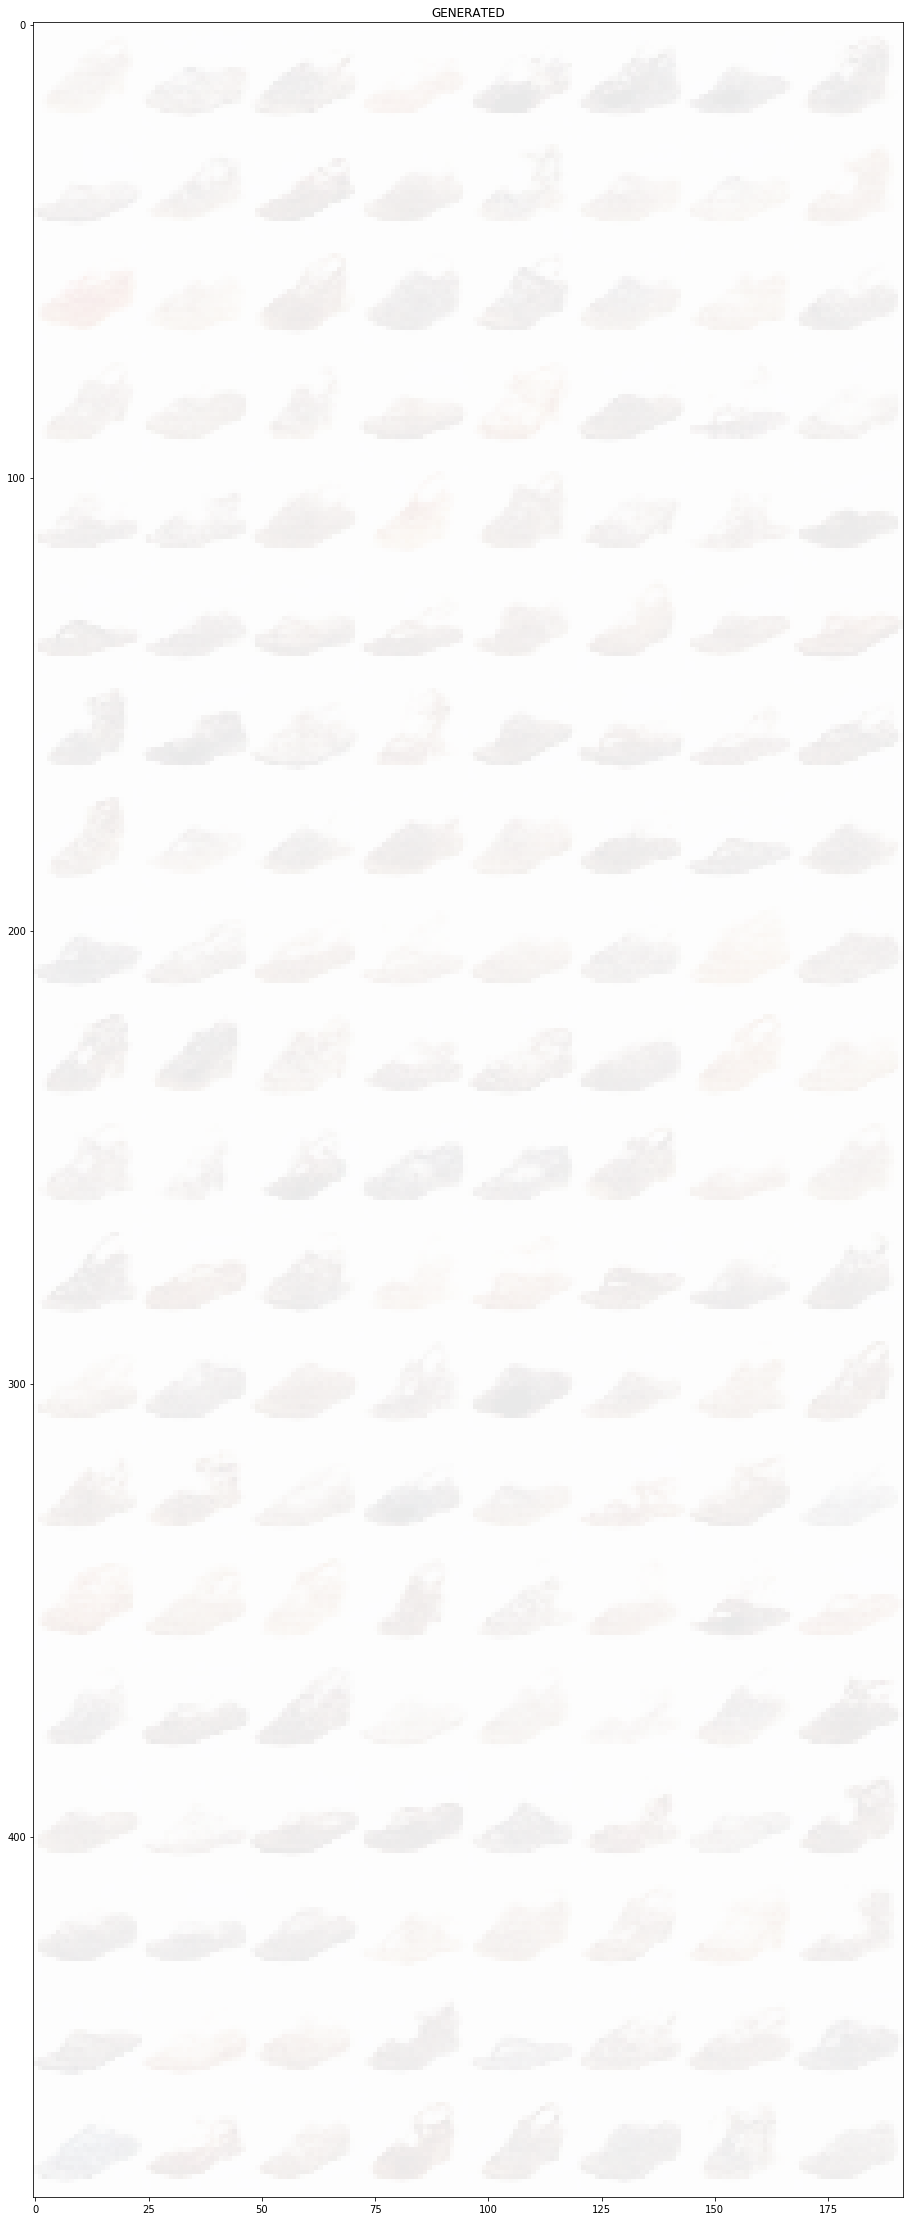

In [32]:
predictions= decoder.predict(np.random.randn(200, latent_dims))
plot_images(20,8,predictions, "GENERATED")

In [27]:
decoder.save('decoder576final_punk.h5')

In [28]:
vae.save('encoder5_punk.h5')

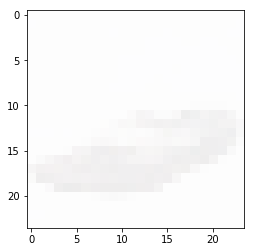

In [29]:
import matplotlib.pyplot as plt 

images = decoder.predict(np.random.randn(1, latent_dims))
plt.imshow(images[0])
# images.shape

In [30]:
la = encoder.predict(shoe_data[:])

In [ ]:
import pickle as pkl 
pkl.dump(la, open('latent_punk.pkl','wb'))